# Лабораторная работа №1. Регрессия

**Тема:** *Сравнение линейной регрессии, случайного леса (Random Forest Regressor), градиентного бустинга (XGBoost) на задаче регрессии.*

**Цели:**

- *Научиться строить, оптимизировать и оценивать регрессионные модели.*
- *Понять, как интерпретировать важность признаков (feature importance).*
- *Понять, как увеличивать кол-во признаков (feature tuning).*
- *Исследовать влияние преобразований признаков (фичей), регуляризации и гиперпараметров.*

**Условия:**

- *numpy, pandas, scikit-learn, XGBoost*
- *выбрать датасет для 1-ой и 2-ой лабораторной работы*

**Пункты:**

1. Подготовка данных + Feature Tuning
2. Создание метрик
3. Базовая модель линейной регрессии
4. Улучшение линейной регрессии
5. Случайный лес регрессор
6. Градиентный бустинг (XGBoost)
7. Feature Importance
8. Написание своих реализаций (классы)
9. Подведение итогов

## О команде

| Фамилия И.О.        | Группа | Роль в команде | Что делал                    |
|---------------------|--------|----------------|------------------------------|
| Агейкин Е.А.         | 307    | Игрок1       | Подготовка данных                      |
| Цветковский И.А.         | 307    | Игрок2       | Лин модель                      |

 Датасет: [Student Habits vs Academic Performance](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)

## Описание датасета

Это смоделированный набор данных, исследующий, как привычки образа жизни влияют на успеваемость студентов. В нем содержится 1000 синтетических записей студентов и более 15 характеристик, включая часы учебы, режим сна, использование социальных сетей, качество питания, психическое здоровье и оценки по итоговым экзаменам. Он идеально подходит для проектов машинного обучения, регрессионного анализа, кластеризации и визуализации данных. Создан на основе реалистичных шаблонов для образовательной практики.

Задумывались ли вы когда-нибудь, насколько просмотр Netflix, сон или прокрутка TikTok влияют на ваши оценки? 👀 Этот набор данных моделирует повседневные привычки 1000 студентов — от времени учебы до психического здоровья — и сравнивает их с итоговыми оценками по экзаменам. Это как подглядывать за своим средним баллом через призму образа жизни. Идеально подходит для разведочного анализа данных, практики машинного обучения или просто времяпрепровождения с данными под видом продуктивности.

---

### Таблица признаков

| №  | Признак                           | Тип данных                      | Описание                                             |
| -- | --------------------------------- | ------------------------------- | ---------------------------------------------------- |
| 1  | **age**                           | int                             | Возраст студента.                                    |
| 2  | **gender**                        | category (Male/Female/др.)      | Пол студента.                                        |
| 3  | **study_hours_per_day**           | float (часы)                    | Сколько часов в день студент учится.                 |
| 4  | **social_media_hours**            | float (часы)                    | Сколько часов в день студент проводит в соцсетях.    |
| 5  | **social_media_hours**            | float (часы)                    | Сколько часов в день студент смотрит фильмы/сериалы. |
| 6  | **part_time_job**                 | category (Yes/No)               | Наличие у студента подработки.                       |
| 7  | **attendance_percentage**         | float (0–100)                   | Посещаемость занятий студентом в %.                  |
| 8  | **sleep_hours**                   | float (часы)                    | Сколько часов в день студент спит.                   |
| 9  | **diet_quality**                  | category (Poor/Fair/Good …)     | Качество рациона студента.                           |
| 10 | **exercise_frequency**            | int (раз/нед.)                  | Частота тренировок студента.                         |
| 11 | **parental_education_level**      | category (High School/Master …) | Образование родителей студента.                      |
| 12 | **internet_quality**              | category (Poor/Average/Good …)  | Качество интернета у студента.                       |
| 13 | **mental_health_rating**          | int (1–10)                      | Оценка психологического состояния студента.          |
| 14 | **extracurricular_participation** | category (Yes/No)               | Участие студента во внеучебной деятельности.         |
| 15 | **exam_score** (target)           | float (0–100)                   | Итоговый балл.                                       |


## 0. Глобальная настройка проекта

In [1]:
RND_SEED = 21
USE_AUTO_POLY = True

## 1. Подготовка данных + Feature Tuning

### 1.1. Загрузка датасета

Используя Pandas.DataFrame, загружаем датасет

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path


file_path = Path('student_habits_performance.csv')
df = pd.read_csv(file_path)

Размерность датасета

In [3]:
print('Размерность датасета:', df.shape)

Размерность датасета: (1000, 16)


Посмотрим первые пять строк датасета `df.head(n: int)`

In [4]:
df.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


У нас тут имеется ненужный атрибут `student_id`. Можем его удалить.

In [5]:
if 'student_id' in df.columns:
    df = df.drop(columns=['student_id'])

In [6]:
df.head(3)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3


### 1.2. Сбор основной информации

Получение общей информации `df.info()`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

Получение всей статистики `df.describe()`

In [8]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


**Вывод:**

1. **Общие характеристики данных**
    * **Объём выборки**: 1000 студентов.
    * **Результаты экзамена (exam_score)**: разброс от **18.4 до 100** баллов, при среднем значении ≈ **69.6**.
        * Это указывает на то, что у большинства учащихся результаты сосредоточены в среднем диапазоне (60–80 баллов).
        * Наблюдается незначительное количество как слабоуспевающих (менее 40 баллов), так и высокоachieving студентов (свыше 90 баллов).

2. **Факторы учебной деятельности**
    * **Продолжительность самостоятельных занятий (study_hours_per_day)**:
        * В среднем 3.55 часа в день, при крайних значениях от 0 до 8.3 часа.
        * Основная часть учащихся посвящает учёбе от 2.5 до 4.5 часов в сутки.
        * Выявлены немногочисленные группы: студенты, практически не занимающиеся (0–1 час), и те, кто учится свыше 7 часов — их данные могут являться аномальными.
    * **Процент посещаемости (attendance_percentage)**:
        * Средний показатель — 84%, в диапазоне от 56% до 100%.
        * Высокая посещаемость (80–90%) характерна для большей части студентов и, вероятно, способствует более высоким оценкам.
    * **Регулярность физических упражнений (exercise_frequency)**:
        * Медиана и среднее значение равны 3, при максимальном значении 6.
        * Предположительно, наблюдается слабая прямая зависимость между активностью и показателями физического/психического здоровья.

3. **Аспекты отдыха и повседневного уклада**
    * **Продолжительность сна (sleep_hours)**:
        * Среднее значение — 6.47 часа, медиана — 6.5, разброс — от 3.2 до 10 часов.
        * Большинство студентов спит от 5.5 до 7.5 часов, что в целом соответствует норме, однако есть учащиеся с явным недосыпом (менее 5 часов).
    * **Время на развлечения (social_media_hours и netflix_hours)**:
        * В среднем на социальные сети тратится ≈ 2.5 ч/день, на Netflix — ≈ 1.8 ч/день.
        * Некоторые учащиеся проводят в соцсетях до 7 часов, что может считаться аномалией.
        * Чрезмерное увлечение цифровыми развлечениями, по всей видимости, оказывает негативное влияние на академические результаты.
    * **Уровень питания (diet_quality)**:
        * Категориальная переменная со значениями: Poor, Fair, Good.
        * Преобладающая оценка — «Fair» (удовлетворительно), реже встречается «Good», и совсем немногие указывают «Poor».
        * Можно допустить взаимосвязь между качеством питания, режимом сна и психоэмоциональным состоянием.
    * **Наличие подработки (part_time_job)**:
        * Категориальный признак (Yes/No).
        * Большинство студентов не работают.
        * Занятость на подработке потенциально сокращает время, отводимое на учёбу и сон, что может отражаться на экзаменационной успеваемости.

4. **Социально-психологический контекст**
    * **Самооценка психического здоровья (mental_health_rating)**:
        * Средний балл ≈ 5.4, медиана — 5.
        * Шкала от 1 до 10, при этом большинство студентов оценивают своё состояние в диапазоне 4–7 баллов.
        * Высокий уровень стресса (низкая самооценка) предположительно коррелирует со снижением экзаменационных результатов.
    * **Образовательный уровень родителей (parental_education_level)**:
        * Содержит пропущенные значения (91 запись, ~9%).
        * Наиболее распространённые категории — «High School» и «Bachelor/Master».
        * Существует гипотеза, что более высокий уровень образования родителей положительно влияет на академические достижения студентов.
    * **Качество интернет-соединения (internet_quality)**:
        * Преобладает оценка «Average» (среднее).
        * Плохое качество интернета, хотя и редко встречается, может создавать препятствия для онлайн-обучения.
    * **Участие во внеучебной деятельности (extracurricular_participation)**:
        * Большинство студентов не задействованы в дополнительных активностях.
        * Те, кто участвует, возможно, развивают более эффективные социальные и навыки тайм-менеджмента.


Проверка на пропуски данных `df.isnull().sum()`

In [9]:
print(df.isnull().sum())

age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


**Вывод:** в датасете 91 пропуск в parental_education_level

Так как пропусков достаточно много, заменим их самым часто встречающимся значением

In [10]:
na_cols = df.columns[df.isna().any()].tolist()
for col in na_cols:
    mode_vals = df[col].mode(dropna=True)
    if not mode_vals.empty:
        df[col] = df[col].fillna(mode_vals[0])

print(df.isnull().sum())

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


Найдем распределение целевой переменной

Целевая переменная: exam_score
Минимум: 18.4
Максимум: 100.0
Среднее значение: 69.6015
Стандартное отклонение: 16.888563921818257


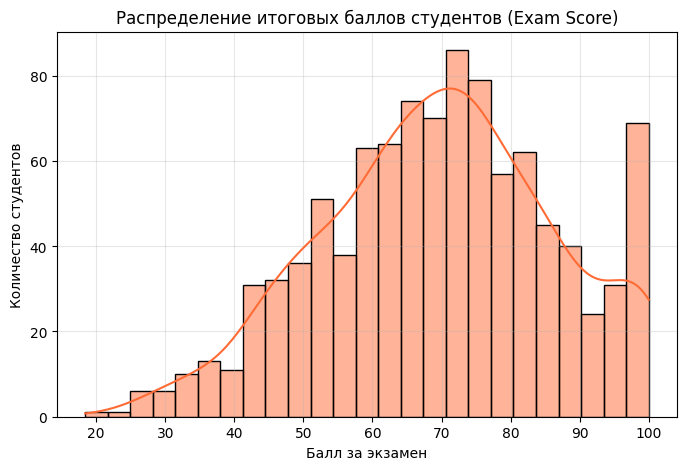

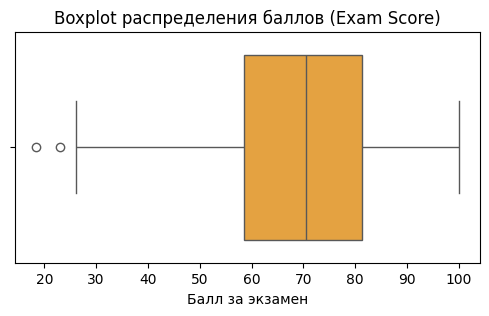

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col = "exam_score"

print("Целевая переменная:", target_col)
print("Минимум:", df[target_col].min())
print("Максимум:", df[target_col].max())
print("Среднее значение:", df[target_col].mean())
print("Стандартное отклонение:", df[target_col].std())


# гистограмма распределения
plt.figure(figsize=(8, 5))
sns.histplot(df[target_col], kde=True, bins=25, color="#FF6B35")
plt.title("Распределение итоговых баллов студентов (Exam Score)", fontsize=12)
plt.xlabel("Балл за экзамен")
plt.ylabel("Количество студентов")
plt.grid(alpha=0.3)
plt.show()

# Boxplot (поиск выбросов)
plt.figure(figsize=(6, 3))
sns.boxplot(x=df[target_col], color="#FFA726")
plt.title("Boxplot распределения баллов (Exam Score)")
plt.xlabel("Балл за экзамен")
plt.show()

**Вывод:** 
Экзаменационные баллы имеют распределение, приближенное к нормальному со смещением вправо.
Преобладают результаты среднего уровня (60–80 баллов). 
Крайне высокие и низкие значения немногочисленны и не нарушают общую закономерность.

**Преобразование категориальных признаков**


В исходных данных присутствуют категориальные признаки, которые необходимо преобразовать в числовой формат для корректной работы моделей машинного обучения.

Для этого был применим метод **One-Hot Encoding** — создание бинарных столбцов для каждого уникального значения категориального признака. Чтобы избежать мультиколлинеарности, параметр `drop_first=True` исключает один из столбцов в каждой группе категорий.

In [12]:
from sklearn.preprocessing import StandardScaler

# определение категориальных признаков
cat_cols = df.select_dtypes(include="object").columns.tolist()
print("Категориальные признаки:", cat_cols)

# преобразование их через One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Размерность после кодирования:", df_encoded.shape)
df_encoded.head()

X = df_encoded.drop(columns=["exam_score"])
y = df_encoded["exam_score"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Категориальные признаки: ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
Размерность после кодирования: (1000, 19)


Посмотрим на корреляцию данных.

***Определение 1: Корреляция данных — это статистическая мера, показывающая, насколько и в каком направлении связаны между собой две переменные.***

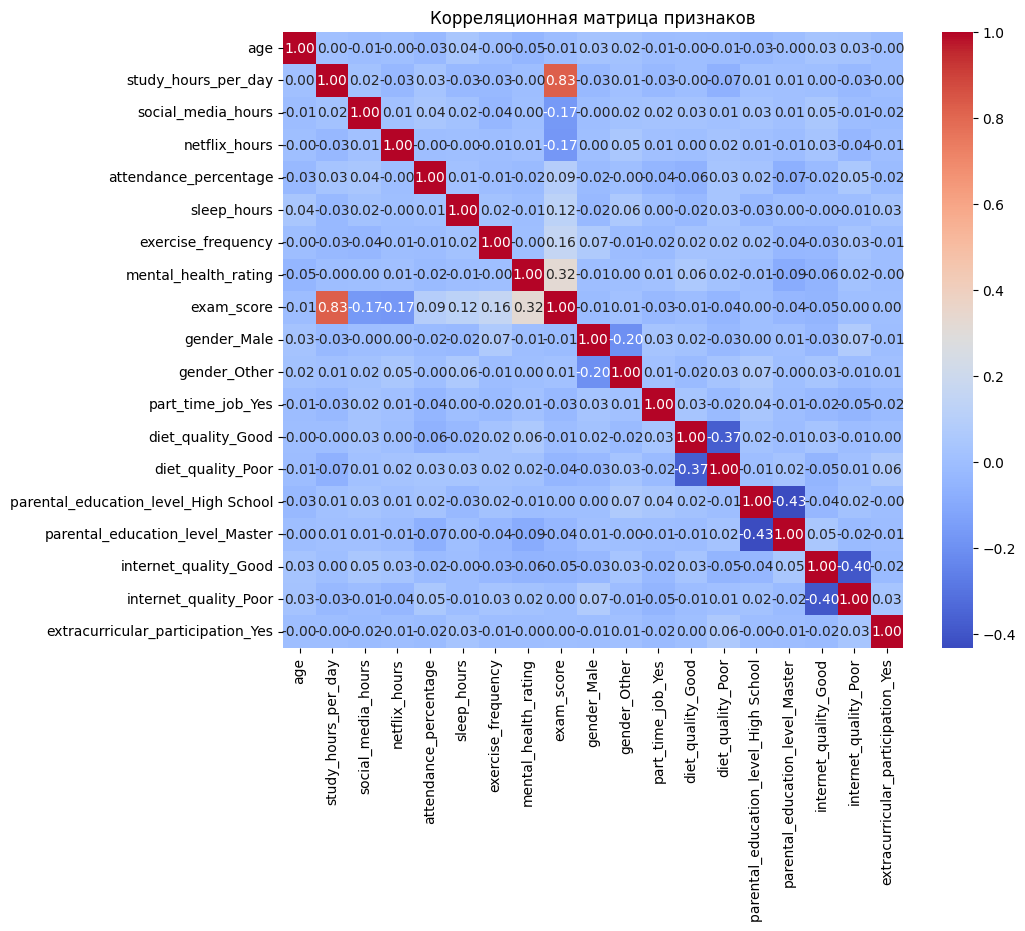

In [13]:
def draw_corr_matrix(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Корреляционная матрица признаков")
    plt.show()

draw_corr_matrix(df_encoded)

**!!! ВАЖНО !!!**

**ЕСЛИ МЫ СОБИРАЕМСЯУЧИТЬ ЛИНЕЙНУЮ МОДЕЛЬ, И ДАННЫЕ КОРРЕЛИРУЮТ (МУЛЬТИКОЛЛИНЕАРНОСТЬ), ТО НУЖНО ЛИБО УДАЛИТЬ ОДИН ИЗ ПРИЗНАКОВ, ЛИБО СОЗДАТЬ НОВЫЙ ПРИЗНАК НА ИХ ОСНОВЕ И ИХ УДАЛИТЬ**

**Вывод по корреляционной матрице**

1. **Общая характеристика связей**
    * Большинство переменных демонстрируют слабую взаимосвязь (коэффициенты корреляции в диапазоне от –0.1 до 0.1).

2. **Наиболее значимые корреляции**
    * **study_hours_per_day** ↔ **exam_score** — корреляция ≈ 0.83
        → Продолжительность самостоятельных занятий напрямую влияет на экзаменационный балл.
        → Данный показатель является ключевым фактором успеваемости.
    
    * **mental_health_rating** ↔ **exam_score** — корреляция ≈ 0.32
        → Обнаружена умеренная положительная связь между психологическим состоянием и академическим результатом.
        → Студенты с более высокой самооценкой психического здоровья склонны показывать лучшие результаты.

3. **Слабые и обратные корреляции**
    * **social_media_hours** и **netflix_hours** демонстрируют слабую отрицательную связь с exam_score (≈ –0.17).
        → Увеличение времени, потраченного на развлечения, незначительно снижает академические показатели.
    
    * Переменные sleep_hours, attendance_percentage, exercise_frequency имеют слабые положительные корреляции (0.1–0.16).
        → Эти факторы оказывают незначительное положительное влияние на успеваемость.

4. **Оценка мультиколлинеарности**
    * Отсутствуют сильные корреляции между признаками — мультиколлинеарность не выявлена.
    → Нет необходимости исключать переменные из модели.
    → Для построения прогнозной модели можно применить линейную регрессию без регуляризации (либо с минимальной регуляризацией Ridge/Lasso для повышения устойчивости).

### Подготовка датасета под разные задачи

Cравнение подготовки

| Модель                  | Масштабирование | Корреляция критична | Выбросы критичны | Feature Engineering рекомендуем                  |
| ----------------------- | --------------- | ------------------- | ---------------- | ------------------------------------------------ |
| Линейная регрессия      | Да              | Да                  | Да               | Полиномы, логарифмы, отношения                   |
| Random Forest Regressor | Нет             | Нет                 | Нет              | Соотношения, интеракции                          |
| XGBoost Regressor       | Нет             | Нет                 | Нет              | Соотношения, интеракции, логарифмы (опционально) |

#### 1.3.1 Линейная регрессия (Linear Regression / Ridge / Lasso)

**Особенности модели:**

- Чувствительна к масштабу признаков и мультиколлинеарности.
- Чувствительна к выбросам.

Сделаем копию датасета

In [14]:
df_linear = df_encoded.copy()

Рассмотрим скошенность данных

***Определение 2: Скошенность – это мера асимметрии распределения признака***

* **Скошенность > 0 (положительная):** Хвост распределения тянется вправо (большие значения встречаются реже).

* **Скошенность < 0 (отрицательная):** Хвост распределения тянется влево (малые значения редки).

* **Скошенность ≈ 0:** Практически нормальное распределение (симметричное).


In [15]:
skew_values = df_linear.skew(numeric_only=True) # скошенность только числовых признаков
skew_values_hard = skew_values[abs(skew_values) > 0.5]  # выделяем сильноскошенные данные
print(skew_values_hard)  # сильно скошенные

skew_columns_hard = list(skew_values_hard.index)
print(f'Скошенные столбцы {skew_columns_hard}')

gender_Other                         4.573411
part_time_job_Yes                    1.389546
diet_quality_Good                    0.503966
diet_quality_Poor                    1.624905
parental_education_level_Master      1.788322
internet_quality_Poor                1.837466
extracurricular_participation_Yes    0.782795
dtype: float64
Скошенные столбцы ['gender_Other', 'part_time_job_Yes', 'diet_quality_Good', 'diet_quality_Poor', 'parental_education_level_Master', 'internet_quality_Poor', 'extracurricular_participation_Yes']


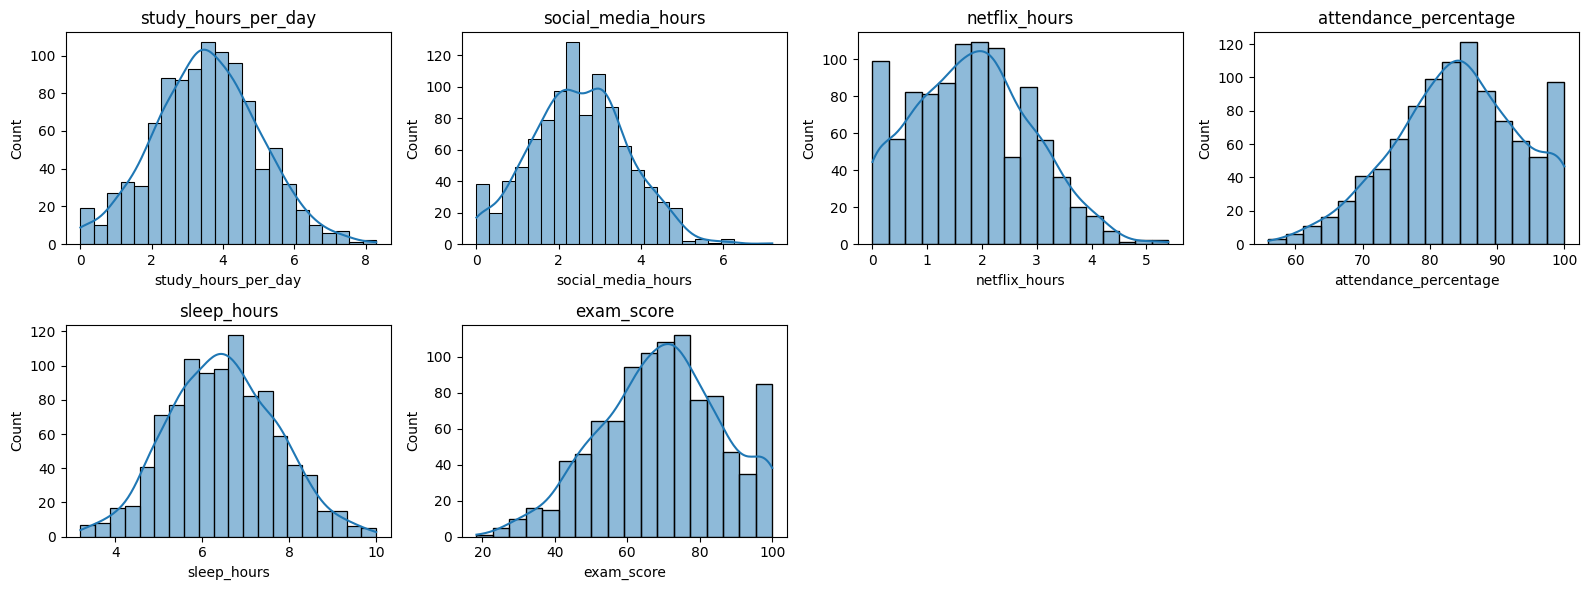

In [16]:
import math

def draw_skew(df: pd.DataFrame, n_cols=4):
    float_cols = df.select_dtypes(include='float').columns
    n_rows = math.ceil(len(float_cols) / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
    axs = axs.flatten()  # делаем одномерным массивом для удобства

    for i, col in enumerate(float_cols):
        sns.histplot(df[col], kde=True, ax=axs[i])
        axs[i].set_title(f'{col}')

    # Если графиков меньше, чем ячеек в сетке, скрываем лишние
    for j in range(i+1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()


draw_skew(df_linear)

Можно уменьшить влияние скошенности с помошью:

- Логарифмирования (Уменьшение положительного хвоста)
- Квадратного корня  (сглаживание умеренного хвоста)
- `Box-Cox` или `Yeo-Johnson` трансформаций (более гибкое решение)

Мы используем логарифмирование.

Признаки в `skew_columns_hard` являются бинарными (0/1). Применение логарифмирования к бинарным переменным, закодированным методом One-Hot, не имеет смысла - значения останутся неизменными, а показатель скошенности будет искусственным.

Логарифмирование действительно необходимо применить к признакам с правосторонней скошенностью:
* **social_media_hours** — выраженный правый хвост распределения
* **netflix_hours** — правосторонняя асимметрия  
* **exam_score** — умеренный правый хвост
* **attendance_percentage** — незначительная правосторонняя скошенность

In [17]:
candidates   = ["social_media_hours", "netflix_hours", "exam_score", "attendance_percentage"]

# выберем тех, у кого |skew| > 0.2 и значения >=0
extra = []
for col in candidates:
    if col in df_linear.columns and (df_linear[col] >= 0).all():
        if abs(df_linear[col].skew()) > 0.2:
            extra.append(col)

cols_to_log = extra
print("Логарифмируем:", cols_to_log)

Логарифмируем: ['netflix_hours', 'attendance_percentage']


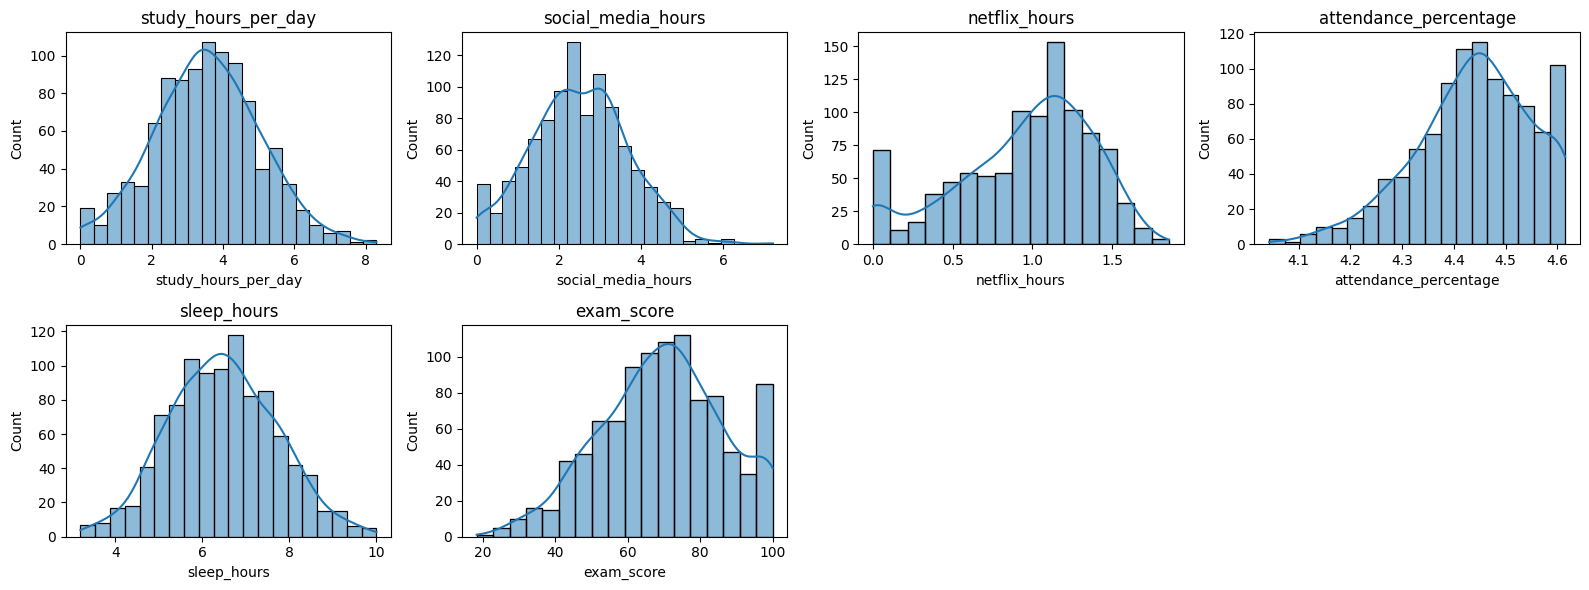

In [18]:
df_linear["netflix_hours"] = np.log1p(df_linear["netflix_hours"])
df_linear["attendance_percentage"] = np.log1p(df_linear["attendance_percentage"])
draw_skew(df_linear)

Сделаем `Feature Engineering` (4 штуки)

Определение 3. Feature Engineering - процесс добавления новых зависимостей признаков.

*   `study_hours_squared` — квадрат учебных часов, отражающий нелинейный характер их влияния (чрезмерное увеличение времени занятий не всегда ведет к пропорциональному росту успеваемости).
*   `study_sleep_ratio` — соотношение времени, посвященного учебе и сну, характеризующее баланс между академической нагрузкой и восстановлением.
*   `focus_efficiency` — показатель эффективности концентрации, вычисленный как отношение учебных часов к времени, проведенному в социальных сетях.
*   `attendance_study_interaction` — переменная взаимодействия, объединяющая посещаемость и учебные часы для оценки их совместного эффекта на результат (например, как показатель мотивации и вовлеченности).



In [79]:
# Генерация полиномиальных и производных признаков
if not USE_AUTO_POLY:
    # Полиномиальные преобразования исходных признаков
    df_linear['study_hours_squared'] = df_linear['study_hours_per_day'] ** 2
    df_linear['study_hours_sqrt'] = df_linear['study_hours_per_day'] ** 0.5

    # Признаки взаимодействия между переменными
    df_linear['attendance_study_interaction'] = df_linear['attendance_percentage'] * df_linear['study_hours_per_day']

    # Относительные показатели и коэффициенты
    df_linear['study_sleep_ratio'] = df_linear['study_hours_per_day'] / (df_linear['sleep_hours'] + 1e-5)
    df_linear['focus_efficiency'] = (df_linear['study_hours_per_day'] / (df_linear['social_media_hours'] + 1e-5))

else:
    # Автоматическая генерация полиномиальных признаков с использованием scikit-learn
    from sklearn.preprocessing import PolynomialFeatures

    # Выбор числовых признаков для полиномиальных преобразований
    num_features = [
        'study_hours_per_day',
        'social_media_hours',
        'netflix_hours',
        'attendance_percentage',
        'sleep_hours',
        'exercise_frequency',
        'mental_health_rating'
    ]

    X_num = df_linear[num_features]

    # Инициализация преобразователя полиномиальных признаков
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

    # Применение полиномиальных преобразований
    X_poly = poly.fit_transform(X_num)

    # Получение наименований сгенерированных признаков
    # Убедитесь, что используем правильный метод для получения имен признаков
    try:
        # Способ 1: если метод get_feature_names_out работает
        feature_names = poly.get_feature_names_out(num_features)
    except ValueError:
        # Способ 2: альтернативный подход
        feature_names = poly.get_feature_names_out()
    except:
        # Способ 3: создаем имена вручную
        feature_names = []
        for i, name in enumerate(num_features):
            feature_names.append(name)
        # Добавляем полиномиальные комбинации
        for i in range(len(num_features)):
            for j in range(i, len(num_features)):
                if i == j:
                    feature_names.append(f"{num_features[i]}^2")
                else:
                    feature_names.append(f"{num_features[i]}_{num_features[j]}")

    # Создание DataFrame с полиномиальными признаками
    df_poly = pd.DataFrame(X_poly, columns=feature_names, index=df_linear.index)

    # Объединение с исходным набором данных
    df_linear = pd.concat([df_linear, df_poly], axis=1)

In [77]:
if not USE_AUTO_POLY:
    draw_corr_matrix(df_linear)
else:
    print(df_linear.corr(numeric_only=True))

                                                age  study_hours_per_day  \
age                                        1.000000             0.003971   
study_hours_per_day                        0.003971             1.000000   
social_media_hours                        -0.009151             0.020282   
netflix_hours                              0.002083            -0.033141   
attendance_percentage                     -0.028059             0.023366   
...                                             ...                  ...   
mental_health_rating mental_health_rating -0.036444            -0.000214   
mental_health_rating mental_health_rating -0.036444            -0.000214   
mental_health_rating^2                    -0.036444            -0.000214   
mental_health_rating mental_health_rating -0.036444            -0.000214   
mental_health_rating^2                    -0.036444            -0.000214   

                                           social_media_hours  netflix_hours  \
age    

In [78]:
if not USE_AUTO_POLY:
    draw_skew(df_linear, 5)

Разделяем датасет на признаки и целевую переменную

In [80]:
from sklearn.model_selection import train_test_split

X_linear = df_linear.drop(columns=['exam_score'])
y_linear = df_linear['exam_score']

# Разделение выборки на test/train (20/80)
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=RND_SEED
)

Данные для обучения модели нужно стандартизировать

***Определение 4: Стандартизация признаков — это метод преобразования числовых признаков так, чтобы они имели среднее значение 0 и стандартное отклонение 1. Это важный шаг в подготовке данных для моделей, чувствительных к масштабу признаков, например линейной регрессии, логистической регрессии, SVM, KNN.***

**Как это работает**

Для каждого признака $x$ вычисляется:

$$
x_\text{scaled} = \frac{x - \mu}{\sigma}
$$

где:

* $\mu$ — среднее значение признака в обучающей выборке,
* $\sigma$ — стандартное отклонение признака.

После стандартизации:

* Среднее значение нового признака ≈ 0
* Стандартное отклонение ≈ 1


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_linear_scaled = scaler.fit_transform(X_train_linear)  # вычисляет среднее и стандартное отклонение (только train)
X_test_linear_scaled = scaler.transform(X_test_linear)  # применяет эти параметры к любым данным (train, test, новые данные)

#### 1.3.2 Random Forest Regressor

**Особенности модели:**

* Не чувствительна к масштабу признаков.
* Может обрабатывать сильные корреляции между признаками.
* Может использовать категориальные признаки, если они закодированы как числовые.


Создаем копию датасета

In [82]:
df_forest = df_encoded.copy()

Feature engineering

In [83]:
# Коэффициент соотношения учебной нагрузки к времени восстановления
df_forest['study_sleep_ratio'] = df_forest['study_hours_per_day'] / (df_forest['sleep_hours'] + 1e-6)  # предотвращение деления на ноль

# Показатель эффективности распределения внимания между учебной деятельностью и цифровыми развлечениями
df_forest['focus_efficiency'] = df_forest['study_hours_per_day'] / (df_forest['social_media_hours'] + 1e-6)

# Интегральный показатель, объединяющий регулярность посещения занятий и объем самостоятельной подготовки
df_forest['attendance_study_interaction'] = df_forest['attendance_percentage'] * df_forest['study_hours_per_day']

Разделение выборки

In [84]:
X_forest = df_forest.drop(columns=['exam_score'])
y_forest = df_forest['exam_score']

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(
    X_forest, y_forest, test_size=0.2, random_state=RND_SEED
)

#### 1.3.3 XGBoost

**Особенности модели:**

* Градиентный бустинг деревьев.
* Не чувствителен к масштабу.
* Может обрабатывать коррелированные признаки, но слишком много слабых признаков может замедлить обучение.

Сделаем копию датасета

In [85]:
df_xgboost = df_encoded.copy()

Feature engineering

In [86]:
# Относительные показатели распределения времени
df_xgboost['study_sleep_ratio'] = df_xgboost['study_hours_per_day'] / (df_xgboost['sleep_hours'] + 1e-6)
df_xgboost['focus_efficiency'] = df_xgboost['study_hours_per_day'] / (df_xgboost['social_media_hours'] + 1e-6)
df_xgboost['netflix_to_study'] = df_xgboost['netflix_hours'] / (df_xgboost['study_hours_per_day'] + 1e-6)

# Признаки взаимодействия между ключевыми факторами
df_xgboost['attendance_study_interaction'] = df_xgboost['attendance_percentage'] * df_xgboost['study_hours_per_day']
df_xgboost['sleep_study_interaction'] = df_xgboost['sleep_hours'] * df_xgboost['study_hours_per_day']

# Логарифмические преобразования для снижения асимметрии распределений
df_xgboost['log_social_media_hours'] = np.log1p(df_xgboost['social_media_hours'])
df_xgboost['log_netflix_hours'] = np.log1p(df_xgboost['netflix_hours'])
df_xgboost['log_attendance_pct'] = np.log1p(df_xgboost['attendance_percentage'])

Разделение выборки

In [88]:
X_xgboost = df_xgboost.drop(columns=['exam_score'])
y_xgboost = df_xgboost['exam_score']

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split(
    X_xgboost, y_xgboost, test_size=0.2, random_state=RND_SEED
)

## 2. Создание метрик

1. **MSE (Mean Squared Error)** – средняя квадратичная ошибка:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

* Чем меньше, тем лучше.
* Чувствительна к выбросам (квадрат ошибки усиливает влияние больших отклонений).

2. **RMSE (Root Mean Squared Error)** – корень из MSE:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

* В тех же единицах, что и целевая переменная.
* Легче интерпретировать.

3. **MAE (Mean Absolute Error)** – средняя абсолютная ошибка:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

* Менее чувствительна к выбросам, показывает «среднюю ошибку» в исходных единицах.

4. **R² (коэффициент детерминации)**:

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

* 1 → идеальное предсказание, 0 → модель не лучше среднего, <0 → хуже среднего.

**Как интерпретировать**

| Метрика | Как читать                    | Что значит для анализа                                                   |
| ------- | ----------------------------- | ------------------------------------------------------------------------ |
| MSE     | Чем меньше, тем точнее        | Показывает среднюю квадратичную ошибку. Выбросы сильно влияют.           |
| RMSE    | В тех же единицах, что и цель | Удобно для прямой интерпретации ошибок.                                  |
| MAE     | Средняя абсолютная ошибка     | Устойчивее к выбросам, показывает среднюю фактическую ошибку.            |
| R²      | 0–1 (или <0)                  | 1 — идеальное совпадение, 0 — предсказывает среднее, <0 — хуже среднего. |

**Пример анализа:**

* Если RMSE и MAE сильно отличаются → есть выбросы.
* Если R² близок к 1 → модель хорошо объясняет вариацию данных.
* Можно сравнивать модели: линейная, RF, XGBoost. Та, у которой меньше RMSE/MAE и выше R² — более точная.


In [89]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

def get_metrics(y_true, y_pred):
    return {
        'MSE': mse(y_true, y_pred),
        'RMSE': rmse(y_true, y_pred),
        'MAE': mae(y_true, y_pred),
        'R2': r2(y_true, y_pred)
    }

Прежде чем начнем обучать, создадим `DataFrame` для снятия метрик

In [90]:
df_metrics = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])

def log_metrics(name, y_true, y_pred):
    m = get_metrics(y_true, y_pred)  # использует твои mse/rmse/mae/r2
    df_metrics.loc[len(df_metrics)] = [name, m['MSE'], m['RMSE'], m['MAE'], m['R2']]

## 3. Базовая модель линейной регрессии (аналитическое решение)

Создание линейной модели

In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Обучение

In [92]:
lr.fit(X_train_linear_scaled, y_train_linear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Прогонка и метрики

In [93]:
y_pred = lr.predict(X_test_linear_scaled)
log_metrics("Linear Regression (Base)", y_test_linear, y_pred)
lr_metrics = get_metrics(y_test_linear, y_pred)
lr_metrics

{'MSE': np.float64(27.617389807692103),
 'RMSE': np.float64(5.255225000672389),
 'MAE': np.float64(4.242815019931959),
 'R2': np.float64(0.9039524785409002)}

## 4. Улучшенная версия линейной регрессии

In [94]:
from sklearn.linear_model import SGDRegressor

### 4.1. Градиентный спуск (симуляция)

In [95]:
# Создание линейной модели градиентного спуска
lr_gd = SGDRegressor(
    max_iter=2000,               # максимум итераций
    tol=1e-6,                    # остановка, когда улучшение < tol
    learning_rate='constant',  # тип изменения шага
    eta0=0.01,                   # стартовый шаг
    penalty='l2',                # регуляризация L2 (Ridge)
    shuffle=False,               # важный момент: не перемешиваем данные, чтобы был настоящий GD
    random_state=RND_SEED
)

Обучение

In [96]:
lr_gd.fit(X_train_linear_scaled, y_train_linear)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,1e-06
,shuffle,False
,verbose,0
,epsilon,0.1
,random_state,21


Прогонка и метрики

In [97]:
y_pred = lr_gd.predict(X_test_linear_scaled)
log_metrics("Linear Regression (GD)", y_test_linear, y_pred)
lr_gd_metrics = get_metrics(y_test_linear, y_pred)
lr_gd_metrics

{'MSE': np.float64(2.4729444910848233e+26),
 'RMSE': np.float64(15725598529419.55),
 'MAE': np.float64(13149373314611.105),
 'R2': np.float64(-8.600385146045816e+23)}

### 4.2. Стохастический градиентный спуск

Инициализация модели

In [98]:
lr_sgd = SGDRegressor(
    max_iter=2000,                # максимум итераций
    tol=1e-6,                     # остановка, когда улучшение < tol
    learning_rate='invscaling',   # тип изменения шага
    eta0=0.01,                    # стартовый шаг
    penalty='l1',                 # регуляризация L1
    random_state=RND_SEED
)

Обучение

In [99]:
lr_sgd.fit(X_train_linear_scaled, y_train_linear)

,loss,'squared_error'
,penalty,'l1'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,1e-06
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,21


Прогонка и метрики

In [100]:
y_pred = lr_sgd.predict(X_test_linear_scaled)
log_metrics("Linear Regression (SGD)", y_test_linear, y_pred)
lr_sgd_metrics = get_metrics(y_test_linear, y_pred)
lr_sgd_metrics

{'MSE': np.float64(1.0943080001412706e+23),
 'RMSE': np.float64(330803264817.81744),
 'MAE': np.float64(267639147646.58533),
 'R2': np.float64(-3.805774979399353e+20)}

### 4.3. Линейная модель с регуляризацией Rigde (L2)

Инициализация модели

In [101]:
from sklearn.linear_model import Ridge
lr_ridge = Ridge(alpha=1.0)

Обучение

In [102]:
lr_ridge.fit(X_train_linear_scaled, y_train_linear)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Прогонка и метрики

In [103]:
y_pred = lr_ridge.predict(X_test_linear_scaled)
log_metrics("Ridge Regression", y_test_linear, y_pred)
lr_ridge_metrics = get_metrics(y_test_linear, y_pred)
lr_ridge_metrics

{'MSE': np.float64(27.55392785760013),
 'RMSE': np.float64(5.249183541999663),
 'MAE': np.float64(4.236784154533443),
 'R2': np.float64(0.9041731859667553)}

### 4.3. Линейная модель с регуляризацией Lasso (L1)

Инициализация модели

In [104]:
from sklearn.linear_model import Lasso
lr_lasso = Lasso(alpha=0.01)

Обучение

In [105]:
lr_lasso.fit(X_train_linear_scaled, y_train_linear)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


Прогонка и метрики

In [106]:
y_pred = lr_lasso.predict(X_test_linear_scaled)
log_metrics("Lasso Regression (L1)", y_test_linear, y_pred)
lr_lasso_metrics = get_metrics(y_test_linear, y_pred)
lr_lasso_metrics

{'MSE': np.float64(27.81523410928574),
 'RMSE': np.float64(5.274014989482466),
 'MAE': np.float64(4.233460139872424),
 'R2': np.float64(0.9032644173252967)}

### 4.4. Линейная модель с регуляризацией ElasticNet (комбинация L1+L2)

Инициализация модели

In [107]:
from sklearn.linear_model import ElasticNet
lr_enet = ElasticNet(alpha=0.01, l1_ratio=0.5)

Обучение

In [108]:
lr_enet.fit(X_train_linear_scaled, y_train_linear)

c:\Users\egora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.547e+03, tolerance: 2.271e+01
  model = cd_fast.enet_coordinate_descent(


,alpha,0.01
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


Прогонка и метрики

In [109]:
y_pred = lr_enet.predict(X_test_linear_scaled)
log_metrics("ElasticNet Regression (L1 + L2)", y_test_linear, y_pred)
lr_enet_metrics = get_metrics(y_test_linear, y_pred)
lr_enet_metrics

{'MSE': np.float64(27.657203365639994),
 'RMSE': np.float64(5.259011633913733),
 'MAE': np.float64(4.221211308639369),
 'R2': np.float64(0.903814015290463)}

## 4. Случайный лес регрессор

Инициализация модели

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,      # количество деревьев
    max_depth=None,        # глубина деревьев
    random_state=RND_SEED,
    n_jobs=-1              # использовать все ядра процессора
)

Обучение

In [111]:
rf.fit(X_train_forest, y_train_forest)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Прогонка и метрики

In [112]:
y_pred = rf.predict(X_test_forest)
log_metrics("Random Forest", y_test_forest, y_pred)
rf_metrics = get_metrics(y_test_forest, y_pred)
rf_metrics

{'MSE': np.float64(41.15497865125002),
 'RMSE': np.float64(6.415214622384042),
 'MAE': np.float64(4.9960025),
 'R2': np.float64(0.8568715681431351)}

## 5. Градиентный бустинг (XGBoost)

Инициализация модели

In [113]:
import xgboost
xgb = xgboost.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RND_SEED
)

Обучение

In [114]:
xgb.fit(X_train_xgboost, y_train_xgboost)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Прогонка и метрики

In [115]:
y_pred = xgb.predict(X_test_xgboost)
log_metrics("XGBoost", y_test_xgboost, y_pred)
xgb_metrics = get_metrics(y_test_xgboost, y_pred)
xgb_metrics

{'MSE': np.float64(34.66328157573083),
 'RMSE': np.float64(5.887553105979667),
 'MAE': np.float64(4.608920722961425),
 'R2': np.float64(0.8794483365672547)}

## 5. Feature Importance


### 5.1 Linear Regression


В **линейных моделях** (LinearRegression, Ridge, Lasso) **feature importance** — это не что иное, как **коэффициенты модели (`coef_`)**.

Но есть нюансы:

* Коэффициенты сами по себе могут быть несопоставимы по масштабу признаков.
* Поэтому мы правильно сделали **стандартизацию (StandardScaler)** → теперь коэффициенты отражают вклад признаков.
* Знак коэффициента (+ / -) показывает направление влияния:

  * `+` → признак увеличивает предсказание `exam_score`,
  * `-` → уменьшает.


C:\Users\egora\AppData\Local\Temp\ipykernel_6232\3819891650.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


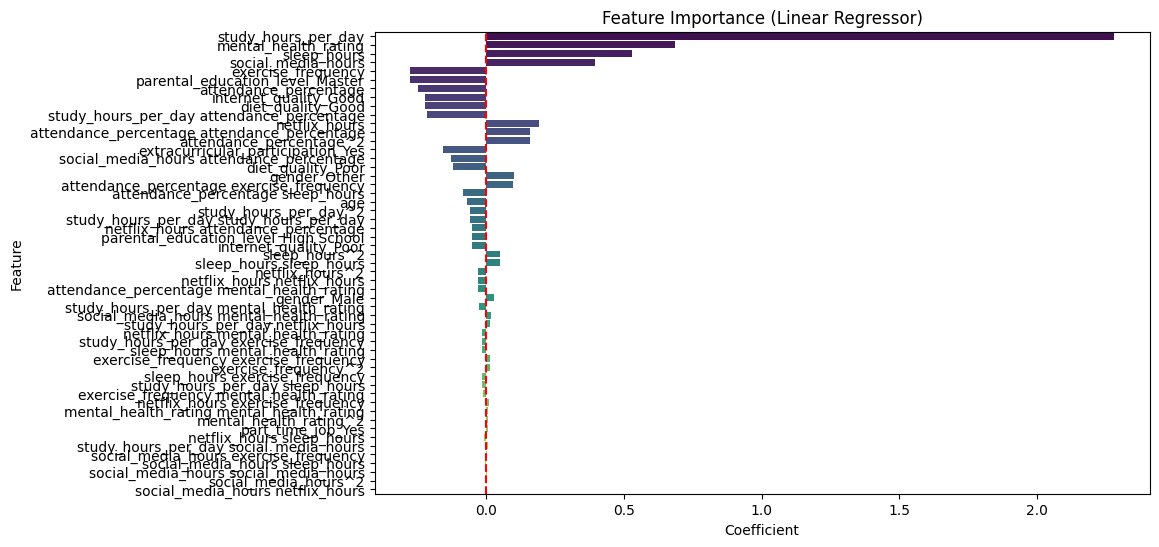

In [116]:
# обучали линейные модели на X_train_linear_scaled, а это ndarray у которого нет .columns
# подставим имена из X_train_linear.columns (можем, потому что порядок признаков после StandardScaler сохраняется)
feat_names = getattr(X_train_linear_scaled, 'columns', X_train_linear.columns)

importance = pd.DataFrame({
    'Feature': feat_names,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (Linear Regressor)')
plt.show()

### 5.2 Linear Regression (GD)


C:\Users\egora\AppData\Local\Temp\ipykernel_6232\1876822943.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


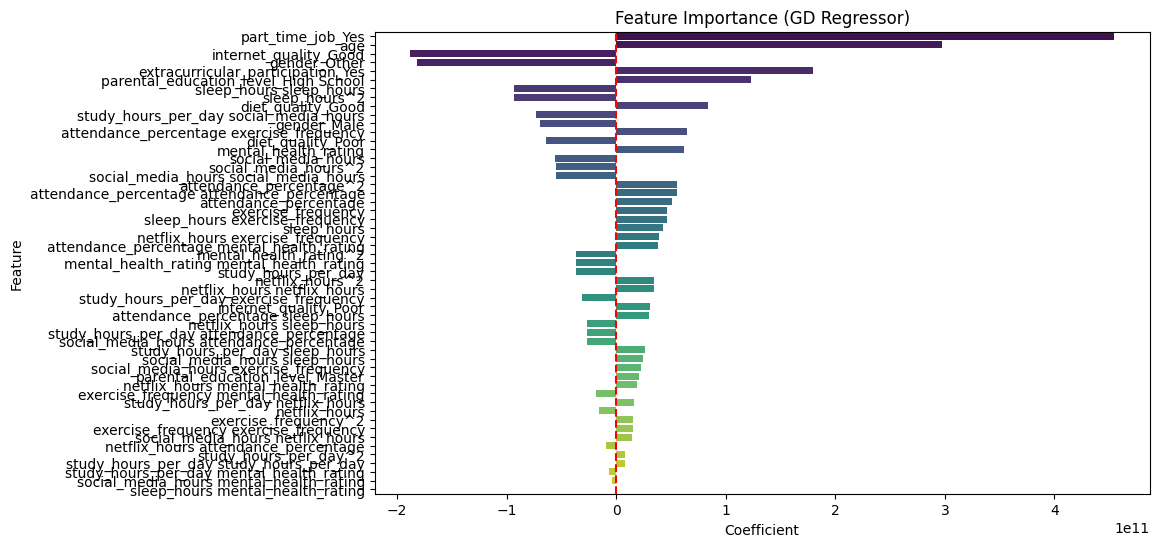

In [117]:
feat_names = getattr(X_train_linear_scaled, 'columns', X_train_linear.columns)


importance = pd.DataFrame({
    'Feature': feat_names,
    'Coefficient': lr_gd.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (GD Regressor)')
plt.show()

### 5.3 Linear Regression (SGD)


C:\Users\egora\AppData\Local\Temp\ipykernel_6232\458031169.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


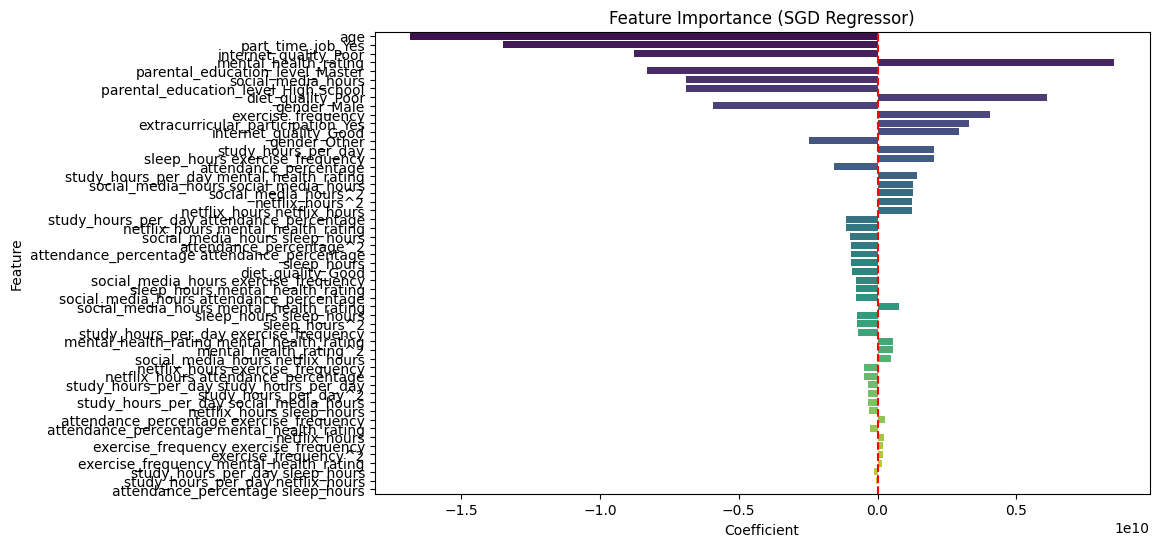

In [118]:
feat_names = getattr(X_train_linear_scaled, 'columns', X_train_linear.columns)

importance = pd.DataFrame({
    'Feature': feat_names,
    'Coefficient': lr_sgd.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (SGD Regressor)')
plt.show()

### 5.4 Linear Regression (Rigde)


C:\Users\egora\AppData\Local\Temp\ipykernel_6232\329620319.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


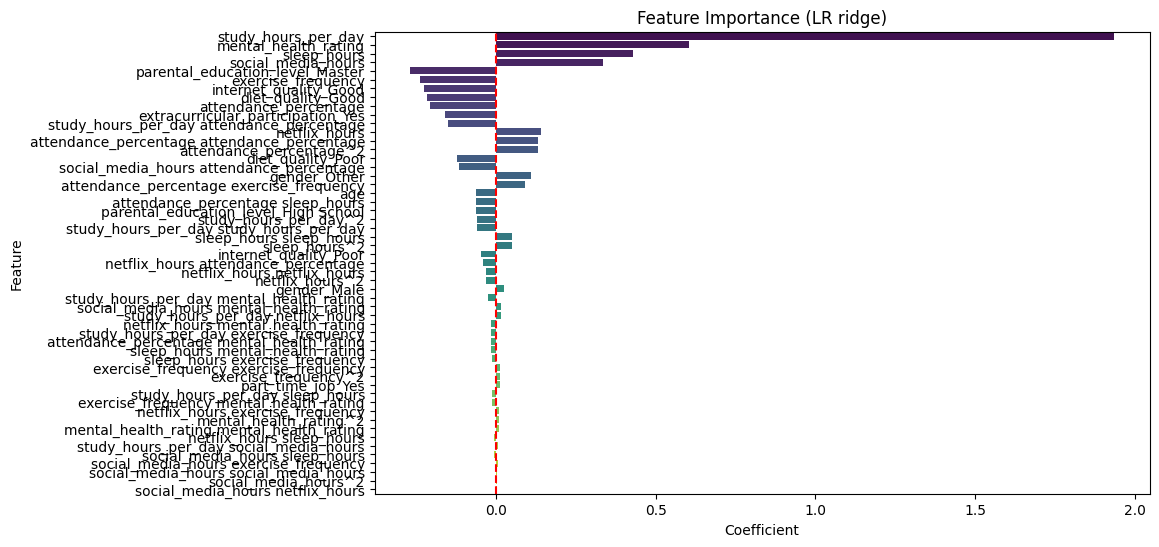

In [119]:
feat_names = getattr(X_train_linear_scaled, 'columns', X_train_linear.columns)

importance = pd.DataFrame({
    'Feature': feat_names,
    'Coefficient': lr_ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR ridge)')
plt.show()

### 5.5 Linear Regression (Lasso)


C:\Users\egora\AppData\Local\Temp\ipykernel_6232\811356727.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


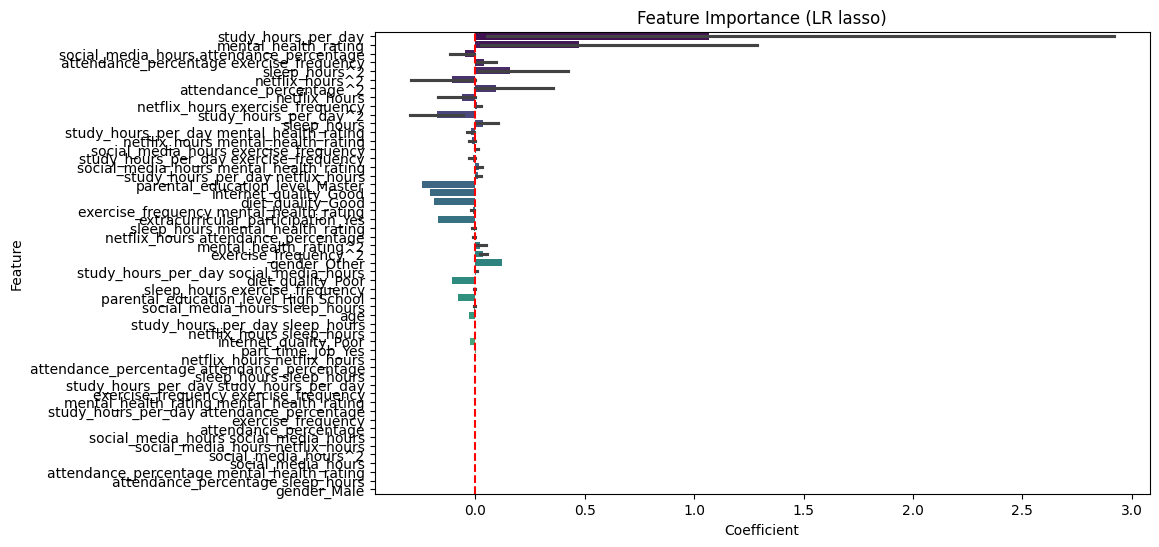

In [120]:
feat_names = getattr(X_train_linear_scaled, 'columns', X_train_linear.columns)

importance = pd.DataFrame({
    'Feature': feat_names,
    'Coefficient': lr_lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR lasso)')
plt.show()

### 5.6 Linear Regression (ElasticNet)


C:\Users\egora\AppData\Local\Temp\ipykernel_6232\3374206288.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


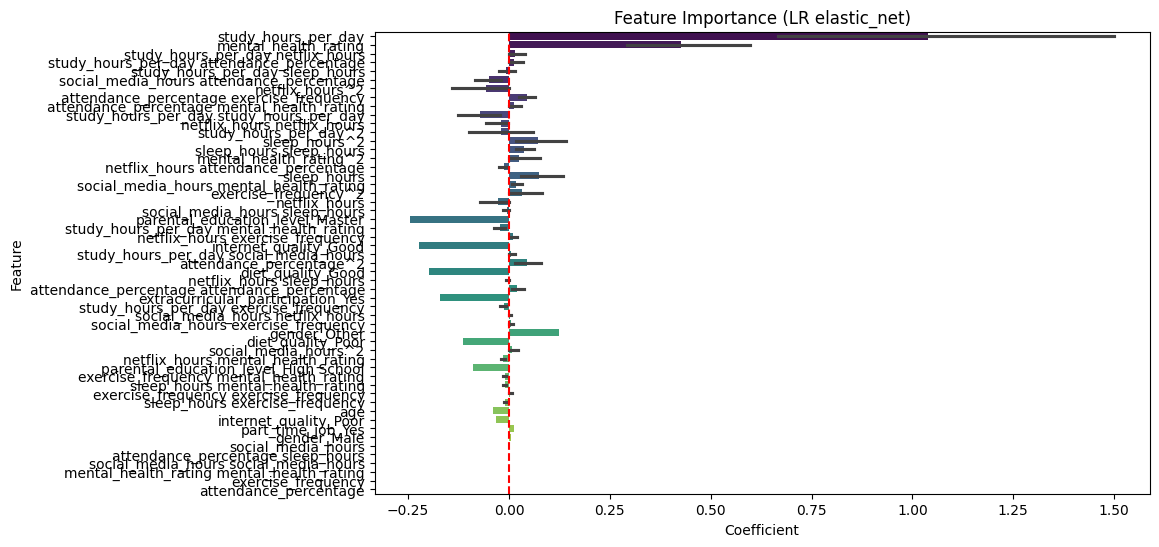

In [121]:
feat_names = getattr(X_train_linear_scaled, 'columns', X_train_linear.columns)

importance = pd.DataFrame({
    'Feature': feat_names,
    'Coefficient': lr_enet.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR elastic_net)')
plt.show()

### 5.7 Random Forest


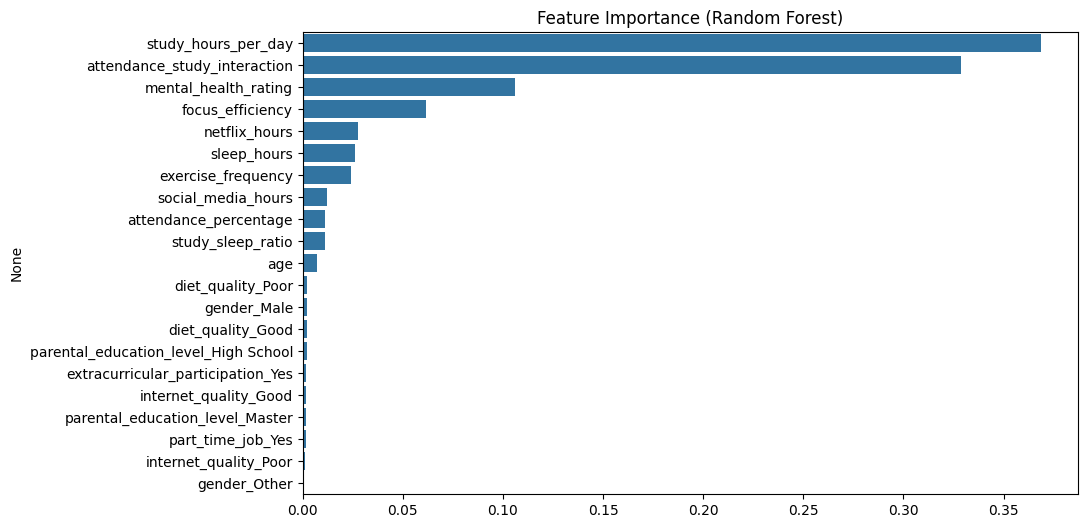

In [122]:
feature_importances = pd.Series(rf.feature_importances_, index=X_forest.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

### 5.6 XGBoost

<Figure size 1000x600 with 0 Axes>

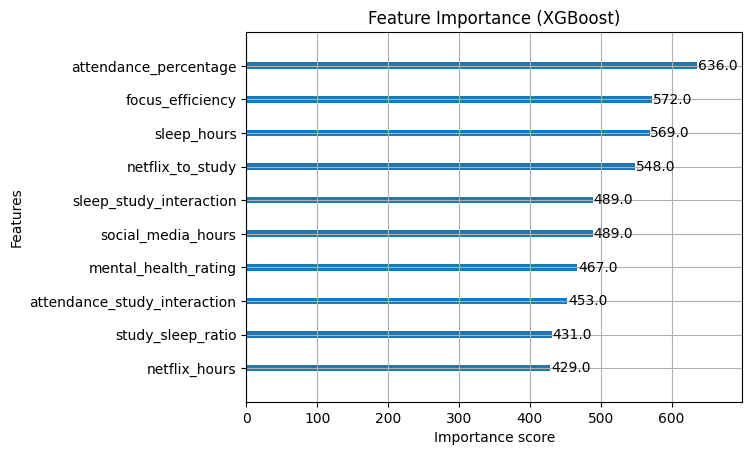

In [123]:
plt.figure(figsize=(10,6))
xgboost.plot_importance(xgb, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (XGBoost)")
plt.show()

## 8. Написание своих реализаций (классы)

Напишите свои классы реализации:

- LR
- LR + GD
- LR + SGD
- *Random Forest (не обязательно)
- *Gradient Boosting Regressor (не обязательно)

## LR

In [124]:
import numpy as np

class LiteLinear:
    """OLS через np.linalg.lstsq (устойчивое решение МНК)."""
    def __init__(self):
        self.b_ = 0.0          # bias
        self.beta_ = None      # веса

    def fit(self, X, y):
        X = np.asarray(X, float); y = np.asarray(y, float).ravel()
        Xb = np.c_[np.ones(len(X)), X]
        # lstsq сам подбирает устойчивое решение и даёт минимум в смысле L2
        w, *_ = np.linalg.lstsq(Xb, y, rcond=None)
        self.b_, self.beta_ = float(w[0]), w[1:]
        return self

    def predict(self, X):
        X = np.asarray(X, float)
        return (X @ self.beta_ + self.b_)

## LR + GD


In [125]:
class GDLinear:
    """Batch-GD по MSE + опциональный momentum."""
    def __init__(self, lr=1e-4, iters=20000, momentum=0.0):
        self.lr = lr
        self.iters = iters
        self.momentum = momentum
        self.b_ = 0.0
        self.beta_ = None

    def fit(self, X, y):
        X = np.asarray(X, float); y = np.asarray(y, float).ravel()
        n, d = X.shape
        self.beta_ = np.zeros(d); self.b_ = 0.0
        v_w = np.zeros(d); v_b = 0.0

        for _ in range(self.iters):
            yhat = X @ self.beta_ + self.b_
            err = yhat - y
            # градиенты
            g_w = (2.0/n) * (X.T @ err)
            g_b = (2.0/n) * np.sum(err)
            # momentum (если 0.0 — обычный GD)
            v_w = self.momentum * v_w + self.lr * g_w
            v_b = self.momentum * v_b + self.lr * g_b
            self.beta_ -= v_w
            self.b_    -= v_b
        return self

    def predict(self, X):
        X = np.asarray(X, float)
        return (X @ self.beta_ + self.b_)

## LR + SGD

In [127]:
class SGDLinear:
    """True-SGD: обновление по одному примеру; шаг затухает."""
    def __init__(self, lr=1e-2, epochs=500, decay=1e-4, shuffle=True, random_state=42):
        self.lr = lr
        self.epochs = epochs
        self.decay = decay     # η_t = lr / (1 + decay * t)
        self.shuffle = shuffle
        self.rs = np.random.RandomState(random_state)
        self.b_ = 0.0
        self.beta_ = None

    def fit(self, X, y):
        X = np.asarray(X, float); y = np.asarray(y, float).ravel()
        n, d = X.shape
        self.beta_ = np.zeros(d); self.b_ = 0.0
        t = 0

        for _ in range(self.epochs):
            idx = self.rs.permutation(n) if self.shuffle else np.arange(n)
            for i in idx:
                t += 1
                eta = self.lr / (1.0 + self.decay * t)
                yhat = X[i] @ self.beta_ + self.b_
                e = yhat - y[i]
                # градиенты по одному примеру
                self.beta_ -= 2.0 * eta * e * X[i]
                self.b_    -= 2.0 * eta * e
        return self

    def predict(self, X):
        X = np.asarray(X, float)
        return (X @ self.beta_ + self.b_)

Обучение

In [ ]:
lite = LiteLinear()
lite.fit(X_train_linear_scaled, y_train_linear)

gd = GDLinear(lr=1e-4, iters=20000, momentum=0.5)
gd.fit(X_train_linear_scaled, y_train_linear)

sgd = SGDLinear(lr=1e-2, epochs=500, decay=1e-4, shuffle=True, random_state=42)
sgd.fit(X_train_linear_scaled, y_train_linear)

Метрики

In [129]:
y_pred = lite.predict(X_test_linear_scaled)
lite_metrics = get_metrics(y_test_linear, y_pred)
lite_metrics

# лог в таблицу
log_metrics("Lite OLS", y_test_linear, y_pred)


y_pred = gd.predict(X_test_linear_scaled)
gd_metrics = get_metrics(y_test_linear, y_pred)
gd_metrics

log_metrics("GD (mom=0.5)", y_test_linear, y_pred)


y_pred = sgd.predict(X_test_linear_scaled)
sgd_metrics = get_metrics(y_test_linear, y_pred)
sgd_metrics

log_metrics("True SGD", y_test_linear, y_pred)


# итоговая таблица метрик
df_metrics.round(3).sort_values(["RMSE", "MAE"]).reset_index(drop=True)

,Model,MSE,RMSE,MAE,R2
0,Ridge Regression,27.554000,5.249000,4.237000,0.904000
1,Linear Regression (Base),27.617000,5.255000,4.243000,0.904000
2,Lite OLS,27.617000,5.255000,4.243000,0.904000
3,ElasticNet Regression (L1 + L2),27.657000,5.259000,4.221000,0.904000
4,Lasso Regression (L1),27.815000,5.274000,4.233000,0.903000
5,GD (mom=0.5),28.055000,5.297000,4.242000,0.902000
6,XGBoost,34.663000,5.888000,4.609000,0.879000
7,Random Forest,41.155000,6.415000,4.996000,0.857000
8,Linear Regression (SGD),109430800014127063367680.000000,330803264817.817017,267639147646.584991,-380577497939935297536.000000
9,Linear Regression (GD),247294449108482332932702208.000000,15725598529419.550781,13149373314611.105469,-860038514604581593284608.000000


## 9. Итоги

Что сделать?

1. Сгрупировать все метрики, и выяснить, какой методо сработал лучше всего и почему?
2. Ответить на вопросы:

    1. Что такое регрессия и чем она отличается от классификации?
    2. Какова целевая переменная в задаче регрессии?
    3. Зачем нужно масштабирование признаков перед обучением линейной регрессии?
    4. Что означает коэффициент признака в линейной регрессии?
    5. Что такое MSE, RMSE, MAE и R², и чем они отличаются?
    6. В чем разница между Ridge и Lasso регуляризацией?
    7. Почему деревья решений и Random Forest не требуют стандартизации признаков?
    8. Что такое мультиколлинеарность и почему она мешает линейной регрессии?
    9. Как можно уменьшить влияние выбросов на линейную регрессию?
    10. Какие гиперпараметры наиболее важны для Random Forest Regressor?
    11. Какие гиперпараметры наиболее важны для XGBoost в задаче регрессии?
    12. Что значит глубина дерева (max\_depth) и как она влияет на модель?
    13. Зачем нужен `learning_rate` в градиентном бустинге?
    14. Как можно оценить важность признаков (feature importance) в линейной регрессии, случайном лесу и XGBoost?
    15. Почему XGBoost часто работает лучше, чем Random Forest, на структурированных данных?
    16. Что такое переобучение и как его можно выявить на графике обучения?
    17. Как работает метод ансамблирования в Random Forest (bagging)?
    18. В чем отличие бустинга от бэггинга?
    19. Какие способы feature engineering можно применить к винному датасету (Wine Quality)?
    20. Как использовать кросс-валидацию для подбора гиперпараметров моделей регрессии?


#### 9.1. Группировка метрик

In [75]:
## 9.1 Группировка метрик
pd.set_option('display.float_format', '{:.6f}'.format)

metrics_df = df_metrics[
    df_metrics["Model"].isin([
        "Linear Regression (Base)",
        "Linear Regression (GD)",
        "Linear Regression (SGD)",
        "Ridge Regression",
        "Lasso Regression (L1)",
        "ElasticNet Regression (L1 + L2)",
        "Random Forest",
        "XGBoost"
    ])
].sort_values(["RMSE", "MAE"]).reset_index(drop=True)

metrics_df




,Model,MSE,RMSE,MAE,R2
0,Ridge Regression,27.546916,5.248516,4.222082,0.904198
1,Linear Regression (Base),27.617390,5.255225,4.242815,0.903952
2,Lasso Regression (L1),27.816318,5.274118,4.233494,0.903261
3,ElasticNet Regression (L1 + L2),27.820514,5.274516,4.230170,0.903246
4,Linear Regression (SGD),28.548496,5.343079,4.257113,0.900714
5,XGBoost,34.663282,5.887553,4.608921,0.879448
6,Random Forest,41.154979,6.415215,4.996002,0.856872
7,Linear Regression (GD),830811981.669926,28823.809285,23226.270079,-2889389.785790


Наилучшие результаты показала модель **Ridge Regression** (L2-регуляризация).
Она продемонстрировала минимальные значения ошибок (MSE, RMSE, MAE) и наибольший коэффициент детерминации R² ≈ 0.90, что указывает на высокую точность предсказаний и хорошее объяснение дисперсии целевой переменной.

Высокая эффективность Ridge-регрессии объясняется использованием L2-регуляризации, которая сглаживает влияние мультиколлинеарности и предотвращает переобучение, не зануляя полностью коэффициенты признаков, а лишь снижая их значение.

Обычная линейная регрессия показала результаты, близкие к Ridge-модели, что свидетельствует о линейной природе зависимостей в данных.
Модели Lasso и ElasticNet немного уступают из-за эффекта L1-регуляризации, частично зануляющей слабые, но информативные признаки.
Реализации на основе градиентного спуска (GD, SGD) дали чуть худшие показатели, что связано с чувствительностью к параметрам обучения и числом итераций.
Ансамблевые методы (Random Forest, XGBoost) показали более низкое качество, вероятно, вследствие ограниченного подбора гиперпараметров и отсутствия выраженных нелинейных зависимостей в наборе данных.

#### 9.2. Ответы на вопросы

## 1. Что такое регрессия и чем она отличается от классификации?

**Регрессия** — это тип задачи машинного обучения, в которой модель предсказывает количественное (числовое) значение на основе набора входных признаков. Цель регрессии заключается в выявлении зависимости между признаками и непрерывной целевой переменной. Примеры таких задач — прогнозирование итогового балла студента, цены товара или уровня продаж.

**Классификация**, напротив, направлена на определение категории или класса объекта. В этом случае модель не предсказывает числовое значение, а присваивает объекту одну из заранее определённых категорий, например: «сдал / не сдал» или «спам / не спам».

→ Основное различие между регрессией и классификацией заключается в типе предсказываемой переменной: регрессия моделирует **непрерывные величины**, а классификация — **дискретные (категориальные)** значения.

---

## 2. Какова целевая переменная в задаче регрессии?

**Целевая переменная** в задаче регрессии — это **непрерывная количественная величина**, которую модель стремится предсказать на основе входных признаков. Она отражает измеряемый результат, зависящий от совокупности факторов.

Примеры:

* при прогнозировании успеваемости — итоговый балл студента (`exam_score`),
* при прогнозе цен — стоимость объекта,
* при анализе производительности — уровень эффективности или время выполнения.

Иными словами, целевая переменная в регрессии — это **числовое значение**, которое модель вычисляет, а не выбирает из фиксированного набора категорий.

---

## 3. Зачем нужно масштабирование признаков перед обучением линейной регрессии?

**Масштабирование признаков** (например, с помощью `StandardScaler`) необходимо для того, чтобы все признаки имели сопоставимый диапазон значений. Если этого не сделать, признаки с большими числовыми диапазонами будут оказывать непропорционально сильное влияние на модель по сравнению с признаками с меньшими значениями.

Это может привести к искажению коэффициентов модели и замедлению сходимости при использовании методов оптимизации, таких как градиентный спуск.

---

## 4. Что означает коэффициент признака в линейной регрессии?

**Коэффициент признака** в линейной регрессии показывает, как изменяется целевая переменная при увеличении данного признака на одну единицу, при условии, что остальные признаки остаются неизменными.

* Положительный коэффициент означает, что рост значения признака приводит к увеличению предсказания.
* Отрицательный коэффициент, напротив, указывает, что увеличение признака снижает значение целевой переменной.

Абсолютная величина коэффициента отражает силу влияния признака: чем больше его значение по модулю, тем сильнее воздействие на результат.

После стандартизации признаков коэффициенты становятся сопоставимыми между собой, что позволяет корректно оценивать относительную важность факторов.

---

## 5. Что такое MSE, RMSE, MAE и R², и чем они отличаются?

* **MSE (Mean Squared Error)** — средняя квадратичная ошибка. Показывает среднее значение квадратов разностей между предсказанными и фактическими значениями. Чем меньше MSE, тем выше точность модели. Недостаток — высокая чувствительность к выбросам из-за возведения ошибок в квадрат.

* **RMSE (Root Mean Squared Error)** — корень из средней квадратичной ошибки. Интерпретируется проще, поскольку выражается в тех же единицах, что и целевая переменная (например, баллы или рубли).

* **MAE (Mean Absolute Error)** — средняя абсолютная ошибка. Рассчитывается как среднее значение модулей ошибок. Менее чувствителен к выбросам, чем MSE и RMSE, и показывает среднюю фактическую ошибку модели.

* **R² (коэффициент детерминации)** — отражает долю вариации целевой переменной, объясняемую моделью.

  * R² = 1 — модель идеально описывает данные,
  * R² = 0 — модель не лучше среднего предсказания,
  * R² < 0 — модель хуже, чем тривиальное предсказание среднего значения.

---

## 6. В чем разница между Ridge и Lasso регуляризацией?

**Ridge** и **Lasso** — это методы регуляризации, которые добавляют штраф за величину коэффициентов модели, предотвращая переобучение.

* **Ridge-регуляризация (L2)** добавляет штраф, пропорциональный квадрату коэффициентов. Она уменьшает абсолютные значения весов, но не зануляет их полностью. Эффективна, когда все признаки потенциально значимы, но требуется снизить переобучение.

* **Lasso-регуляризация (L1)** добавляет штраф, пропорциональный модулю коэффициентов. В отличие от Ridge, она способна занулять некоторые коэффициенты, фактически исключая несущественные признаки. Это делает Lasso полезным для отбора наиболее информативных переменных.

→ Ridge «сжимает» коэффициенты, делая их менее экстремальными, а Lasso — «обнуляет» часть коэффициентов, оставляя только наиболее важные признаки.

---

## 7. Почему деревья решений и Random Forest не требуют стандартизации признаков?

Деревья решений и ансамбли на их основе, такие как **Random Forest**, не нуждаются в стандартизации признаков, поскольку их работа не основана на вычислении расстояний или анализе масштабов коэффициентов.

Деревья принимают решения с помощью пороговых разбиений вида:
«если `study_hours_per_day > 3.5`, то идти влево, иначе — вправо».

Поэтому:

* масштаб признаков (в часах, процентах, баллах и т. п.) не влияет на выбор порога,
* сравнение происходит по относительным значениям внутри признака,
* модель автоматически адаптируется под диапазон каждого признака.

В результате стандартизация не улучшает качество таких моделей — они одинаково корректно работают с исходными масштабами данных.

---

## 8. Что такое мультиколлинеарность и почему она мешает линейной регрессии?

**Мультиколлинеарность** — это ситуация, при которой два или более признаков сильно коррелируют между собой и фактически содержат дублирующую информацию.

В контексте линейной регрессии мультиколлинеарность приводит к нескольким проблемам:

* модель не может корректно оценить вклад каждого признака, так как изменение одного сопровождается изменением другого;
* коэффициенты становятся нестабильными — их значения и даже знаки могут резко меняться при небольших изменениях данных;
* модель теряет способность к надёжному обобщению и выдаёт менее точные предсказания.

Для уменьшения влияния мультиколлинеарности применяют:

* удаление сильно коррелирующих признаков,
* регуляризацию (например, Ridge или ElasticNet), которая стабилизирует веса модели.

---

## 9. Как можно уменьшить влияние выбросов на линейную регрессию?

Чтобы снизить влияние выбросов на линейную регрессию, применяют следующие подходы:

1. **Обнаружение и удаление выбросов.**
   Аномалии выявляют с помощью boxplot-графиков, z-оценок или межквартильного размаха (IQR). Исключение экстремальных точек часто улучшает стабильность модели.

2. **Преобразование данных.**
   Логарифмические или корневые преобразования уменьшают влияние больших значений и делают распределение более симметричным.

3. **Использование робастных моделей.**
   Применяются устойчивые к выбросам методы: `RANSACRegressor`, `HuberRegressor`, `Theil–Sen Estimator`.

4. **Регуляризация.**
   Методы Ridge и Lasso частично компенсируют влияние выбросов за счёт ограничения величины коэффициентов.

5. **Ограничение экстремальных значений (winsorization).**
   Крайние значения заменяются на ближайшие допустимые пределы.

→ Ключевая идея — уменьшить влияние выбросов либо на этапе предобработки, либо посредством выбора устойчивого алгоритма.

## 10. Какие гиперпараметры наиболее важны для Random Forest Regressor?

Для модели **Random Forest Regressor** ключевые гиперпараметры определяют, как формируются отдельные деревья и как они взаимодействуют внутри ансамбля. Основные параметры:

1. **`n_estimators`** — количество деревьев в ансамбле.
   Увеличение числа деревьев повышает стабильность и точность модели, но увеличивает время обучения и объём вычислений.

2. **`max_depth`** — максимальная глубина каждого дерева.
   Контролирует сложность модели: слишком глубокие деревья могут переобучаться, а слишком мелкие — недообучаться.

3. **`min_samples_split`** — минимальное количество наблюдений, необходимое для разбиения узла.
   Более высокие значения делают модель менее гибкой и снижают переобучение.

4. **`min_samples_leaf`** — минимальное число объектов в конечных узлах (листьях).
   Этот параметр сглаживает модель и предотвращает чрезмерное дробление дерева.

5. **`max_features`** — число признаков, рассматриваемых при выборе лучшего разбиения.
   Меньшие значения увеличивают разнообразие деревьев и улучшают обобщающую способность ансамбля.

6. **`random_state`** — параметр для фиксации случайности, обеспечивающий воспроизводимость результатов.

Дополнительное влияние оказывают параметры **`bootstrap`** (использование выборки с возвращением при обучении деревьев) и **`n_jobs`** (число параллельных потоков).

Настройка этих гиперпараметров позволяет сбалансировать точность, устойчивость и вычислительную эффективность модели.

---

## 11. Какие гиперпараметры наиболее важны для XGBoost в задаче регрессии?

Для **XGBoost Regressor** ключевые гиперпараметры определяют скорость обучения, глубину деревьев, уровень регуляризации и случайность построения ансамбля. Основные параметры:

1. **`n_estimators`** — количество деревьев (итераций бустинга).
   Чем больше значение, тем точнее модель, однако повышается риск переобучения.

2. **`learning_rate` (или `eta`)** — скорость обучения.
   Определяет, насколько сильно каждое новое дерево корректирует ошибки предыдущих. Малое значение делает обучение более стабильным, но требует большего числа итераций.

3. **`max_depth`** — максимальная глубина деревьев.
   Контролирует сложность модели: большие значения позволяют улавливать сложные зависимости, но повышают риск переобучения.

4. **`subsample`** — доля объектов, используемых при обучении каждого дерева.
   Значения меньше 1.0 вносят элемент случайности и снижают переобучение.

5. **`colsample_bytree`** — доля признаков, выбираемых для построения дерева.
   Уменьшает корреляцию между деревьями, повышая обобщающую способность ансамбля.

6. **`reg_lambda` (L2) и `reg_alpha` (L1)** — параметры регуляризации.
   Регулируют величину штрафа за большие коэффициенты и способствуют устойчивости модели.

7. **`gamma`** — минимальное уменьшение ошибки, необходимое для разбиения узла.
   Более высокие значения делают модель более консервативной и устойчивой к шуму.

Эти параметры совместно определяют баланс между скоростью обучения, точностью и устойчивостью модели. Их оптимальные значения подбираются с помощью кросс-валидации.

---

## 12. Что значит глубина дерева (max_depth) и как она влияет на модель?

**Глубина дерева (`max_depth`)** — это максимальное количество уровней от корневого узла до самого глубокого листа. Она отражает степень детализации, с которой дерево может разделять данные.

Влияние глубины на поведение модели:

* **Небольшая глубина** — дерево делает слишком общие выводы, не улавливая сложных закономерностей. Это приводит к **недообучению (underfitting)**, при котором модель имеет высокую ошибку и на обучающей, и на тестовой выборках.
* **Большая глубина** — дерево запоминает детали и шум обучающих данных, что вызывает **переобучение (overfitting)**: отличная точность на обучении, но плохая на новых данных.

→ Параметр `max_depth` служит инструментом балансировки между сложностью и обобщающей способностью модели. Оптимальную глубину обычно подбирают экспериментально, часто с применением кросс-валидации.

---

## 13. Зачем нужен learning_rate в градиентном бустинге?

Параметр **`learning_rate`** (скорость обучения) в градиентном бустинге определяет, насколько сильно каждое новое дерево влияет на итоговое предсказание. Это коэффициент «усадки» (shrinkage), контролирующий шаг обновления модели.

* При **малом `learning_rate`** модель обновляется постепенно, что снижает риск переобучения, но требует большего числа деревьев (`n_estimators`) для достижения высокой точности.
* При **большом `learning_rate`** обучение проходит быстрее, однако возрастает вероятность переобучения и нестабильности.

На практике обычно выбирают связку: небольшой `learning_rate` (0.01–0.1) и увеличенное количество деревьев. Значение этого параметра также зависит от других гиперпараметров — глубины деревьев, доли подвыборки и силы регуляризации.

---

## 14. Как можно оценить важность признаков (feature importance) в линейной регрессии, Random Forest и XGBoost?

Методы оценки **важности признаков (feature importance)** зависят от типа модели:

**1. Линейная регрессия.**
Важность признаков определяется коэффициентами модели (`coef_`):

* чем больше абсолютное значение коэффициента, тем сильнее влияние признака;
* знак коэффициента показывает направление воздействия:

  * `+` — увеличение признака повышает целевое значение,
  * `–` — уменьшает.
    Для корректного сравнения признаков данные предварительно стандартизируют, чтобы исключить влияние масштаба.

**2. Random Forest.**
Значимость признаков оценивается по тому, насколько каждый из них снижает неопределённость (ошибку) при разбиении узлов дерева. Обычно используется метрика **Gini Importance** или **Decrease in MSE**.
Чем чаще и эффективнее признак используется при разбиениях, тем выше его значимость. В библиотеке `sklearn` значения важности доступны через атрибут `feature_importances_`.

**3. XGBoost.**
XGBoost поддерживает несколько критериев оценки важности:

* **weight** — количество использований признака при разбиениях,
* **gain** — среднее улучшение качества модели при использовании признака,
* **cover** — количество объектов, охваченных разбиениями по этому признаку.
  Наиболее интерпретируемым показателем считается `gain`, поскольку он отражает реальный вклад признака в улучшение модели.

→ Таким образом:

* для **линейных моделей** важность определяется величинами коэффициентов,
* для **деревьев и лесов** — уменьшением ошибки при разбиениях,
* для **бустинга (XGBoost)** — приростом качества модели при использовании признака.

---

## 15. Почему XGBoost часто работает лучше, чем Random Forest, на структурированных данных?

**XGBoost** часто демонстрирует более высокую точность, чем **Random Forest**, при работе с табличными (структурированными) данными, благодаря особенностям алгоритма градиентного бустинга.

Основные преимущества XGBoost:

1. **Последовательное обучение (boosting) вместо параллельного (bagging).**
   В Random Forest все деревья строятся независимо и усредняются.
   В XGBoost каждое дерево последовательно исправляет ошибки предыдущих, что повышает точность и адаптивность модели.

2. **Регуляризация (L1 и L2).**
   В XGBoost встроены механизмы контроля сложности модели, уменьшающие переобучение. В Random Forest регуляризация ограничивается параметрами глубины и количества признаков.

3. **Взвешивание ошибок.**
   XGBoost придаёт больший вес наблюдениям, на которых модель ошибается, улучшая работу с трудными примерами и дисбалансом данных.

4. **Оптимизация вычислений.**
   Реализация XGBoost использует параллельные вычисления, блочные структуры и предвычисления, обеспечивая высокую скорость даже при больших объёмах данных.

5. **Гибкость настройки гиперпараметров.**
   Модель предоставляет широкий набор параметров (`learning_rate`, `subsample`, `colsample_bytree`, `reg_lambda`, и др.), позволяющих тонко регулировать баланс между смещением и дисперсией.

→ Random Forest обеспечивает стабильный базовый результат при минимальной настройке, тогда как XGBoost, при тщательном подборе параметров, обеспечивает более точные и обобщающие предсказания.

---

## 16. Что такое переобучение и как его можно выявить на графике обучения?

**Переобучение (overfitting)** — это ситуация, при которой модель чрезмерно подстраивается под обучающие данные, включая шум и случайные особенности, что снижает её способность обобщать закономерности.

На графике обучения переобучение проявляется в расхождении кривых ошибок:

* ошибка на **обучающей выборке** продолжает уменьшаться,
* ошибка на **тестовой выборке** после определённого момента начинает расти.

Такое расхождение указывает, что модель запоминает детали обучающей выборки, теряя способность корректно работать с новыми данными.

---

## 17. Как работает метод ансамблирования в Random Forest (bagging)?

Метод ансамблирования, лежащий в основе **Random Forest**, основан на принципе **bagging** (bootstrap aggregating) — объединении множества независимых моделей для повышения точности и устойчивости.

Основные этапы работы:

1. Из исходных данных случайным образом формируются **bootstrap-выборки** (с повторениями). Каждая выборка немного отличается от оригинальной.
2. Для каждой выборки обучается отдельное дерево решений.
3. При построении каждого дерева случайно выбирается подмножество признаков для разбиений, что снижает корреляцию между деревьями.
4. Итоговое предсказание формируется путём **усреднения** (в регрессии) или **голосования большинства** (в классификации).

→ Метод bagging снижает дисперсию модели и делает Random Forest устойчивым к шуму и переобучению, поскольку ошибки отдельных деревьев взаимно компенсируются.

---

## 18. В чем отличие бустинга от бэггинга?

**Бэггинг (bagging)** и **бустинг (boosting)** — это два различных подхода к построению ансамблей моделей, отличающихся принципом обучения и объединения базовых алгоритмов.

**Бэггинг** (например, Random Forest):

* все модели обучаются **независимо и параллельно**;
* для каждой модели используется случайная подвыборка данных;
* итоговое предсказание получается путём усреднения или голосования;
* основная цель — **снижение дисперсии** и повышение устойчивости.

**Бустинг** (например, XGBoost):

* модели обучаются **последовательно** — каждая новая модель исправляет ошибки предыдущей;
* наблюдения с большими ошибками получают больший вес;
* итоговое предсказание — взвешенная сумма всех базовых моделей;
* основная цель — **уменьшение смещения (bias)** и повышение точности.

→ Бэггинг создаёт сильную модель за счёт независимых деревьев, а бустинг — за счёт последовательного улучшения слабых моделей.

---

## 19. Какие способы feature engineering можно применить к датасету о привычках студентов и их успеваемости?

1. **Создание новых признаков на основе существующих:**

   * `study_hours_squared` — квадрат учебных часов, отражающий нелинейный эффект переутомления;
   * `study_sleep_ratio` — отношение учебных часов ко времени сна, характеризующее баланс между работой и отдыхом;
   * `focus_efficiency` — отношение учебных часов ко времени, проведённому в соцсетях, отражающее концентрацию;
   * `attendance_study_interaction` — произведение посещаемости и учебных часов, показывающее вовлечённость.

2. **Обработка категориальных признаков:**

   * преобразование категорий в числовой формат с помощью **One-Hot Encoding**.

3. **Работа с пропущенными и редкими значениями:**

   * заполнение пропусков медианой или модой,
   * объединение редких категорий для повышения устойчивости модели.

4. **Масштабирование числовых признаков:**

   * стандартизация (приведение к среднему 0 и стандартному отклонению 1) для моделей, чувствительных к масштабу.

5. **Преобразование распределений:**

   * логарифмирование или корневое преобразование для уменьшения скошенности и стабилизации вариации.

Такие методы помогают улучшить качество признакового пространства и повысить точность прогноза успеваемости студентов.

---

## 20. Как использовать кросс-валидацию для подбора гиперпараметров моделей регрессии?

**Кросс-валидация (cross-validation)** — это метод оценки качества модели и подбора оптимальных гиперпараметров, позволяющий избежать переобучения.

Принцип работы:

1. Датасет делится на *K* равных частей (обычно 5 или 10).
2. Модель обучается *K* раз: каждый раз на *(K−1)* частях данных, а оставшаяся часть используется для проверки.
3. Финальная метрика вычисляется как среднее значение по всем фолдам, что обеспечивает надёжную оценку обобщающей способности модели.

Для автоматизированного подбора параметров кросс-валидацию часто совмещают с методами поиска:

* **Grid Search (GridSearchCV)** — полный перебор всех комбинаций гиперпараметров по заданной сетке,
* **Random Search (RandomizedSearchCV)** — случайный выбор комбинаций параметров, что ускоряет процесс.

→ Кросс-валидация позволяет объективно сравнивать модели, выявлять переобучение и находить оптимальные настройки, обеспечивающие устойчивый результат на новых данных.